In [1]:
#librerias a utilizar:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#para ver valores faltantes:
import missingno as msno
#para codificar:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

#Para bajar los csv desde el repo: 
#import requests
#import io



In [2]:
# Cargo los archivos:
df_test=pd.read_csv('hospitalizaciones_test.csv')
df_train=pd.read_csv('hospitalizaciones_train.csv')

#si quiero prescindir del los csv en mi repo:
#ME CHILLA X CERTIFICATE! 
#url_test= 'https://raw.github.com/soyHenry/Datathon/blob/main/hospitalizaciones_test.csv'
#url_train= 'https://raw.github.com/soyHenry/Datathon/blob/main/hospitalizaciones_train.csv'
#df_test=pd.read_csv(url_test) #index=0?
#df_train=pd.read_csv(url_train)
#CON REQUEST:
#download_test = requests.get(url_test).content
# Reading the downloaded content and turning it into a pandas dataframe
#df_tes = pd.read_csv(io.StringIO(download_test.decode('utf-8')))


In [3]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [4]:
df_train.head(10)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34
5,2,gynecology,F,Dr Olivia,2,130189,21-30,Female,Trauma,Moderate,Other,2,Yes,4539.268397,11
6,7,gynecology,D,Dr Olivia,5,11175,31-40,Female,Emergency,Moderate,Other,3,Yes,4669.961786,8
7,3,gynecology,B,Dr Sophia,8,82988,21-30,Female,Emergency,Moderate,Heart disease,3,Yes,5101.675480,7
8,2,TB & Chest disease,A,Dr John,7,80339,31-40,Other,Trauma,Moderate,Other,2,No,4899.767616,12
9,4,gynecology,D,Dr Sarah,7,89055,41-50,Female,Trauma,Extreme,Asthama,4,No,3350.366777,8


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Available Extra Rooms in Hospital  90000 non-null  int64  
 1   Department                         90000 non-null  object 
 2   Ward_Facility_Code                 90000 non-null  object 
 3   doctor_name                        90000 non-null  object 
 4   staff_available                    90000 non-null  int64  
 5   patientid                          90000 non-null  int64  
 6   Age                                90000 non-null  object 
 7   gender                             90000 non-null  object 
 8   Type of Admission                  90000 non-null  object 
 9   Severity of Illness                90000 non-null  object 
 10  health_conditions                  90000 non-null  object 
 11  Visitors with Patient              90000 non-null  int

In [6]:
df_test.head(10)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695
5,4,radiotherapy,E,Dr Sam,10,127273,71-80,Male,Trauma,Extreme,Diabetes,2,No,4840.117059
6,3,gynecology,D,Dr Sarah,6,45625,41-50,Female,Urgent,Minor,Asthama,2,No,5348.684488
7,4,gynecology,F,Dr Sophia,5,111363,31-40,Female,Trauma,Moderate,Heart disease,4,Yes,3619.299900
8,5,anesthesia,E,Dr John,1,111476,51-60,Female,Trauma,Moderate,Asthama,4,No,4843.129200
9,5,gynecology,D,Dr Sophia,1,83233,31-40,Female,Trauma,Minor,Heart disease,8,Yes,5965.483139


In [7]:
print(df_train.columns)
print(df_test.columns)

Index(['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'patientid', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Visitors with Patient', 'Insurance', 'Admission_Deposit',
       'Stay (in days)'],
      dtype='object')
Index(['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'patientid', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Visitors with Patient', 'Insurance', 'Admission_Deposit'],
      dtype='object')


Como primera observacion basica, los datasets no contienen nulls (pero en si casos como 'Other', 'None'. HAY QUE ANALIZARLOS).
df_test no tiene la columna 'Stay (in days)'. Pero los features en comun, tienen mismo nombre y tipo de dato. 

In [8]:
# CONSIDERACION DE FEATURES/DIMENSIONES (1ra clasificacion 'a mano'): 
# dimensiones que no deberian tener correlacion con el target (Stay (in days:), ya que son informacion no relevante (en principio):
corr_baja = ['Ward_Facility_Code', 'patientid', 'Visitors with Patient', 'Admission_Deposit']

# dimensiones que podrian tener alguna correlacion: varias seguramente No sean para nada relevantes. 
corr_dudosa = ['doctor_name', 'gender', 'staff_available', 'Insurance', 'Available Extra Rooms in Hospital'] #'Available Extra Rooms in Hospital'? interesante ver que dicen los modelos sobre este feature. 

# dimensiones que DEBERIAN tener alta correlacion: incluso propongo, como primera hipotesis, que estas deberian ser TODAS las dimensiones principales de mi modelo 'elegido'. 
corr_alta = ['Department', 'Age', 'Type of Admission', 'Severity of Illness', 'health_conditions']

# obs: incluso doctor_name podria tener algo de 'peso', por/ej un doctor que trate primariamente afecciones graves, derivaria en mayor probabilidad de internaciones prolongadas. 
# Pero seria bueno que mi modelo no dependa del doctor_name, mas bien de la afeccion y de su grado.

#LUEGO, ya se en cuales columnas centrar mi EDA, y cuales seguro no merecen atencion. 

In [9]:
#tienen duplicados? 
df_train[df_train.duplicated()]


,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)


In [10]:
df_test[df_test.duplicated()]
#en ambos no me devuelve mas que los titulos, por lo que NO tienen duplicados. 

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit


In [11]:

df_train.shape

(410000, 15)

In [12]:
len(df_train.patientid.unique()) #esto me dice q tengo muchos id repetidos. 

122394

In [13]:
df_train.patientid.value_counts() #podria pensar, mientras mas veces un mismo paciente ingresa, mas chances de quedar internado? que se repita su Id, le da mas prob de quedar en 'Long Stay'???

44572     18
125618    18
3635      17
126681    17
126170    17
          ..
106383     1
61225      1
77996      1
46153      1
63598      1
Name: patientid, Length: 122394, dtype: int64

In [14]:
# y en test?:
df_test.patientid.value_counts()

124677    8
44191     7
39971     7
125678    7
46071     7
         ..
78905     1
46771     1
63473     1
45835     1
33937     1
Name: patientid, Length: 62979, dtype: int64

In [15]:
#analizo cada feature, para saber que transformaciones debo realizar, para poder codificarlas de manera relevante.  
#los features de corr_baja: ni los miro? o por las dudas si? 
#los features dudosos:
df_train.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [16]:
#analizo qué valores toman:
df_train.staff_available.unique()

array([ 0,  2,  8,  7, 10,  5,  9,  3,  6,  4,  1])

In [17]:
df_train.doctor_name.unique()
# solo tengo 9 doctor_names. 

array(['Dr Sophia', 'Dr Olivia', 'Dr Mark', 'Dr John', 'Dr Sarah',
       'Dr Sam', 'Dr Nathan', 'Dr Simon', 'Dr Isaac'], dtype=object)

In [18]:
df_train.Insurance.unique() # no hay valores atipicos o 'raros'.

array(['Yes', 'No'], dtype=object)

In [19]:
print(df_train['Available Extra Rooms in Hospital'].unique())
len(df_train['Available Extra Rooms in Hospital'].unique())

[ 4  2  7  3  5 10  6  1 21  8 11 13  9 14 24  0 12 20]


18

In [20]:
corr_alta

['Department',
 'Age',
 'Type of Admission',
 'Severity of Illness',
 'health_conditions']

In [21]:
#los features seguramente relevantes:
df_train.Department.unique()

array(['gynecology', 'anesthesia', 'TB & Chest disease', 'radiotherapy',
       'surgery'], dtype=object)

In [22]:
df_train.Age.unique() #ya esta discretizada, cubre todas las edades <=100.

array(['41-50', '31-40', '21-30', '71-80', '11-20', '51-60', '61-70',
       '81-90', '91-100', '0-10'], dtype=object)

In [23]:
df_train['Type of Admission'].unique() #solo tengo 3, bien facil para codificar. 

array(['Trauma', 'Urgent', 'Emergency'], dtype=object)

In [24]:
df_train['Severity of Illness'].unique() # minor=1, moderate=2, extreme=3 ??

array(['Extreme', 'Minor', 'Moderate'], dtype=object)

In [25]:
df_train.health_conditions.unique()

array(['Diabetes', 'Heart disease', 'None', 'Other', 'Asthama',
       'High Blood Pressure'], dtype=object)

In [26]:
# cuanto me respresentan los 'None' y 'Other'?:
print(len(df_train[df_train['health_conditions'] == 'Other'])) #represeta casi un 20% de  df_train!
print(len(df_train[df_train['health_conditions'] == 'None'])) #representa como el 35% !!
# HACER UN PAIR PLOT o algo para juntar todo esto en un grafico?

#print((df_train[df_train['health_conditions'] == 'Other'].sum()/len(df_train)) * 100) #chilla por types...!
#print((df_train[df_train['health_conditions'] == 'None'].sum()/len(df_train)) * 100)

78335
137202


In [27]:
#uso la libreria missingno para ver nulos:

#msno.bar(df_test)
#plt.show()

#NO ME SIRVE PUES LOS FALTANTES ESTAN COMO 'Other' y 'None', por lo que no me los toma. Resto de variables ya se que no tienen nulos.  


Conclusion hasta aca: df_train esta bastante completo, sin valores faltantes o raros, salvo en 'health_conditions', donde hay muchos None y Other. EN PRINCIPIO, ESTO PUEDE QUERER INDICAR QUE NO VA A SER MUY DETERMINANTE esta variable?
Deberia ser MUY determinante. Habria q ver, de los 'Stay > 8 days', cuantos son None y Other....

In [28]:
#para estar mas seguro, deberia hacer todo esto para Test tambien!, y estar seguro que al modelo le doy datos buenos....
# tanto para Train como para Test.  

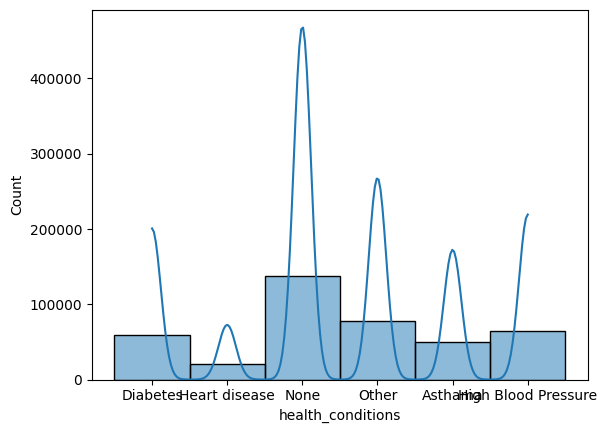

In [29]:
# MIRO ALGUNAS DISTRIBUCIONES:
# Distribucion de 'health_conditions':
sns.histplot(x = 'health_conditions', data= df_train, kde = True)
plt.show()
#no hago nada pues los None pueden ser datos reales suministrados por el paciente. Idem para Other. 

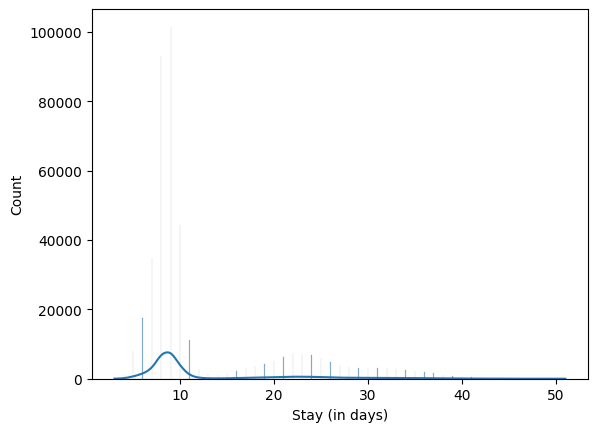

In [30]:
# Distribucion de 'Stay (in days)':
sns.histplot(x = 'Stay (in days)', data= df_train, kde = True)
plt.show()

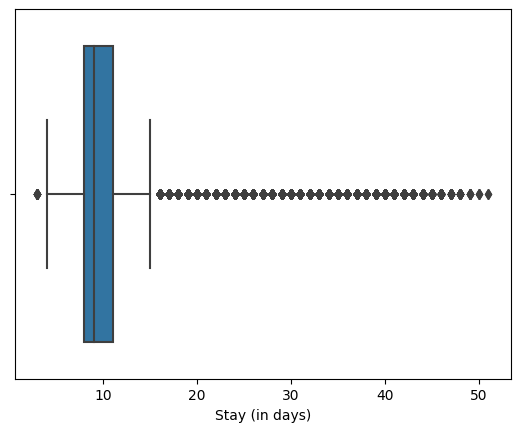

In [31]:
# BUSCO valores atipicos o Outliers:

sns.boxplot(x = 'Stay (in days)', data = df_train)
plt.show()
# en este caso no me aporta informacion nueva respecto al histplot. 

In [32]:
# pruebo un pairplot:
#sns.pairplot(df_train, hue='Stay (in days)') # palette = ['r', 'b', 'g'])
#plt.show()
#no tiene sentido todabia pues solo me considera las variables numericas?

Debo reescalar o normalizar algunas de mis variables? Lo que si es seguro es que las tengo que codificar. 
Siendo que las variables son en su mayoria son categoricas nominales, por lo visto en la 1ra  parte del analisis, y que la unica con sesgos es la variable target, no rescalo ninguna. Al menos por ahora. Sí procedo a codificarlas: 

In [33]:
print(corr_dudosa)
print(corr_alta)
print(corr_baja) # me deberia quedar 'patientid' ya que la unica que referencia al paciente!
# o hacer el enconding a todas las variables y ver con la matriz de correlacion, cuales me indica que no son relevantes...

['doctor_name', 'gender', 'staff_available', 'Insurance', 'Available Extra Rooms in Hospital']
['Department', 'Age', 'Type of Admission', 'Severity of Illness', 'health_conditions']
['Ward_Facility_Code', 'patientid', 'Visitors with Patient', 'Admission_Deposit']


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

PRIMERO, codifico las variables categoricas ORDINALES:
(LabelEncoder, OrdinalEncoder o funcion propia!)


In [35]:
#variable 'Insurance': la tomo como ordinal! (igualmente al tomar solo dos valores, es muy similar a OneHot, pero me aniade una columna menos..)
le = preprocessing.LabelEncoder()
df_train['Insurance2']=le.fit_transform(df_train['Insurance'])

In [36]:
#checkeo a ver como me asigno los valores: 'Yes' =1, 'No'=0. OK! 
df_train.Insurance.head(2)

0    Yes
1     No
Name: Insurance, dtype: object

In [37]:
df_train.Insurance2.head(2)

0    1
1    0
Name: Insurance2, dtype: int64

In [38]:
df_train.Age.value_counts()

21-30     135029
31-40     106772
41-50      65973
11-20      36760
61-70      21781
51-60      17733
71-80      15384
81-90       6678
0-10        2753
91-100      1137
Name: Age, dtype: int64

In [39]:
# variable 'Age':(notar q ya esta discretizada...)
le = preprocessing.LabelEncoder()
df_train['Age2']=le.fit_transform(df_train['Age'])

In [40]:
df_train.Age2.value_counts() #me tomó ok el orden, como esperaba. 

2    135029
3    106772
4     65973
1     36760
6     21781
5     17733
7     15384
8      6678
0      2753
9      1137
Name: Age2, dtype: int64

In [41]:
#variable 'health_conditions':
#como se distrubuye respecto al target? 
#df_train.plot(x="health_conditions", y='Stay (in days)', kind="bar")
#SE ME CUELGA!! la hago con OneHot mas abajo!

In [42]:
#variable 'Type of Admission':
df_train['Type of Admission'].unique()
#quisiera: trauma=1, urgent=2, Emergency=3, solo por notar a simple vista su jerarquia de importancia. 

array(['Trauma', 'Urgent', 'Emergency'], dtype=object)

In [43]:
#lo hago manualmente: creo una nueva columna como una lista, y se la agrego a mi dataframe:
type_admission=[]
for row in df_train['Type of Admission']:
    if row == 'Trauma': type_admission.append(1)
    if row == 'Urgent': type_admission.append(2)
    if row == 'Emergency': type_admission.append(3)
#agrego la nueva columna, como esta lista. 
df_train['type_admission']=type_admission

In [44]:
df_train.type_admission.value_counts()

1    254698
3    111374
2     43928
Name: type_admission, dtype: int64

In [45]:
#variable 'Severity of Illness':
df_train['Severity of Illness'].unique()
#quisiera: minor=0, moderate=1, extreme=2. 
#como se distribuye respecto de la variable target?

array(['Extreme', 'Minor', 'Moderate'], dtype=object)

In [46]:
#de la misma manera, codifico 'Severity of Illness':
severity_of_illnes=[]
for row in df_train['Severity of Illness']:
    if row == 'Minor': severity_of_illnes.append(0)
    if row == 'Moderate': severity_of_illnes.append(1)
    if row == 'Extreme': severity_of_illnes.append(2)

#agrego la nueva columna, como esta lista. 
df_train['severity_of_illnes']=severity_of_illnes

In [47]:
df_train['Severity of Illness'].value_counts()

Moderate    230819
Minor       107897
Extreme      71284
Name: Severity of Illness, dtype: int64

In [48]:
df_train.severity_of_illnes.value_counts()

1    230819
0    107897
2     71284
Name: severity_of_illnes, dtype: int64

In [49]:
#one hot encoder: seria viable por el hecho de ser un dataset con pocas columnas, y ademas, con pocos unique values cada una. 
# tirar una de de las columnas dummy para cada feature>>??? 'reference column'...

#probar DTrees con labelenconder, y otros con OneHoT!!
#creo mejor es ORDINAL ENCONDER! le puedo yo asignar los valores???

In [50]:
# variable target 'Stay (in days)': (esta discretizada).
# agrego una nueva columna target:      #la podria definir como funcion.. ? ver luego si lo necesito. 
#primero, creo una lista y la poblo segun la condicion de consignas:
long_stay=[]
for row in df_train['Stay (in days)']:
    if row > 8: long_stay.append(1)
    else: long_stay.append(0)
#agrego la nueva columna, como esta lista. 
df_train['long_stay']=long_stay
 

In [51]:
df_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),Insurance2,Age2,type_admission,severity_of_illnes,long_stay
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,1,4,1,2,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,0,3,1,0,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7,1,2,1,2,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8,0,3,2,1,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34,0,7,1,1,1


AHORA, las variables categoricas NOMINALES: gender, doc name, type of admission, department, 
ESTAS SI LAS PUEDO HACER CON ONE HOT. VER: 
'hacer un pd.Dataframe con la transformación del onehot y en columns poner el objeto de onehot.get_feature_names_out_'

In [52]:

# variable 'gender', codifico con OneHotEncoder:
df_train.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [53]:
gender = df_train[['gender']]
encoder = OneHotEncoder(handle_unknown = 'ignore')
gender2 = pd.DataFrame.sparse.from_spmatrix(encoder.fit_transform(gender), columns=encoder.get_feature_names_out(['gender'])) #defino columnas para no perder las denominaciones con .get_feature...!
#y se lo agrego a mi df:
df_train = df_train.join(gender2)



In [54]:
#checheo que haya quedado como esperado:
df_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,...,Admission_Deposit,Stay (in days),Insurance2,Age2,type_admission,severity_of_illnes,long_stay,gender_Female,gender_Male,gender_Other
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,...,2966.408696,8,1,4,1,2,0,1.0,0.0,0.0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,...,3554.835677,9,0,3,1,0,1,1.0,0.0,0.0
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,...,5624.733654,7,1,2,1,2,0,1.0,0.0,0.0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,...,4814.149231,8,0,3,2,1,0,1.0,0.0,0.0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,...,5169.269637,34,0,7,1,1,1,0.0,1.0,0.0


In [55]:
#variable health_conditions, aplico OneHotEncoder:
df_train.health_conditions.unique()


array(['Diabetes', 'Heart disease', 'None', 'Other', 'Asthama',
       'High Blood Pressure'], dtype=object)

In [56]:
#aplico el mismo proced que para 'gender':
health_conditions = df_train[['health_conditions']] #...seria lo mismo con [] simples ?
encoder = OneHotEncoder(handle_unknown = 'ignore')
health_conditions2 = pd.DataFrame.sparse.from_spmatrix(encoder.fit_transform(health_conditions), columns=encoder.get_feature_names_out(['health_conditions'])) 
#y se lo agrego a mi df:
df_train = df_train.join(health_conditions2)
#checkeo q este ok en df_train.head(). OK!. DESVENTAJA: JUSTO ESTE FEATURE TIENE VARIOS VALORES, POR LO Q ME AGREGA DEMASIADAS COLLUMNAS, PERO igualmente, deberia tener 
# bastante peso en el modelo, ya que es un feature bastante relevante, o deberia serlo!!

In [57]:
# variable 'Department': aplico OneHhotEncoder, a pesar de q me agrega varias columnas...:
df_train.Department.unique()

array(['gynecology', 'anesthesia', 'TB & Chest disease', 'radiotherapy',
       'surgery'], dtype=object)

In [58]:
df_train.Department.value_counts()
#se ve que la gran mayoria son de gineco. 

gynecology            281625
radiotherapy           69132
anesthesia             36250
TB & Chest disease     18825
surgery                 4168
Name: Department, dtype: int64

In [59]:
#cuantos casos tengo de long_stay para 'ginecology'?: 
df_train[(df_train['Department']=='gynecology') & (df_train['long_stay']==1)].shape
#es mas del 30% !!, PERO A SU VEZ, son cerca de la mitad de todos los de gineco...(28k)

(154209, 29)

In [60]:
#nuevamente el mismo procedimiento:
Department = df_train[['Department']] #...seria lo mismo con [] simples ?
encoder = OneHotEncoder(handle_unknown = 'ignore')
Department2 = pd.DataFrame.sparse.from_spmatrix(encoder.fit_transform(Department), columns=encoder.get_feature_names_out(['Department'])) 
#y se lo agrego a mi df:
df_train = df_train.join(Department2)

In [61]:
#variable 'doctor_name':
df_train.doctor_name.unique()

array(['Dr Sophia', 'Dr Olivia', 'Dr Mark', 'Dr John', 'Dr Sarah',
       'Dr Sam', 'Dr Nathan', 'Dr Simon', 'Dr Isaac'], dtype=object)

In [62]:
df_test.doctor_name.unique() #Son los mismos. los codifico con OneHotEncoder:

array(['Dr Olivia', 'Dr John', 'Dr Sam', 'Dr Sarah', 'Dr Sophia',
       'Dr Nathan', 'Dr Mark', 'Dr Isaac', 'Dr Simon'], dtype=object)

In [63]:
# mismo procedimiento:
doctor_name = df_train[['doctor_name']]
encoder = OneHotEncoder(handle_unknown = 'ignore')
doctor_name2 = pd.DataFrame.sparse.from_spmatrix(encoder.fit_transform(doctor_name), columns=encoder.get_feature_names_out(['doctor_name'])) 
#y se lo agrego a mi df:
df_train = df_train.join(doctor_name2)

In [64]:
#cuantas columnas tiene mi df ahora? 43!!! 
df_train.shape

(410000, 43)

In [65]:
#df_train[['doctor_name','long_stay']].plot.bar()
#se me cuelga! 39min....! habra q hacerlo con promedios??

In [66]:
# MODELO BENCHMARK, lo calculo como  casos favorables/casos totales, es decir, como una Probabilidad:
prob_long_stay= (df_train[df_train['long_stay']==1].shape[0])/410000
prob_long_stay
# luego tengo 0.623 de Prob de que un caso sea 'long_stay'. Con lo cual, mis mmodelos deberian tener metricas mayores a esta. accuracy?


0.6229658536585366

In [67]:
#df_train.shape[0]
df_train[df_train['long_stay']==1].shape[0]


255416

Ahora, por un lado debo hacer las mismas transformaciones a df_test para obtener las misma columnas, y por otro, la matriz de correlacion, en base a eso hacer mi feature selection.

OBS: si quiero facilmente realizarle la Transformacion al df_test, agarro todas las celdas de Transf de este notebook, las junto y las defino como una funcion, con input el df o el csv, y output el nuevo df y o el csv! 

OJO!!, tambien le dropie cols=['Available Extra Rooms in Hospital' , 'staff_available', 'Insurance2'], y entreno con df_train4

In [68]:
# ETL para df_test:
#junto aca todas las modificaciones.


#variable 'Insurance': l
'''le = preprocessing.LabelEncoder()
df_train['Insurance2']=le.fit_transform(df_train['Insurance'])

# variable 'Age':(notar q ya esta discretizada...)
le = preprocessing.LabelEncoder()
df_train['Age2']=le.fit_transform(df_train['Age'])

#lo hago manualmente: creo una nueva columna como una lista, y se la agrego a mi dataframe:
type_admission=[]
for row in df_train['Type of Admission']:
    if row == 'Trauma': type_admission.append(1)
    if row == 'Urgent': type_admission.append(2)
    if row == 'Emergency': type_admission.append(3)
#agrego la nueva columna, como esta lista. 
df_train['type_admission']=type_admission

#de la misma manera, codifico 'Severity of Illness':
severity_of_illnes=[]
for row in df_train['Severity of Illness']:
    if row == 'Minor': severity_of_illnes.append(0)
    if row == 'Moderate': severity_of_illnes.append(1)
    if row == 'Extreme': severity_of_illnes.append(2)

#agrego la nueva columna, como esta lista. 
df_train['severity_of_illnes']=severity_of_illnes

# variable target 'Stay (in days)': (
# agrego una nueva columna target:       
#primero, creo una lista y la poblo segun la condicion de consignas:
long_stay=[]
for row in df_train['Stay (in days)']:
    if row > 8: long_stay.append(1)
    else: long_stay.append(0)
#agrego la nueva columna, como esta lista. 
df_train['long_stay']=long_stay
 
gender = df_train[['gender']]
encoder = OneHotEncoder(handle_unknown = 'ignore')
gender2 = pd.DataFrame.sparse.from_spmatrix(encoder.fit_transform(gender), columns=encoder.get_feature_names_out(['gender'])) #defino columnas para no perder las denominaciones con .get_feature...!
#y se lo agrego a mi df:
df_train = df_train.join(gender2)

#aplico el mismo proced que para 'gender':
health_conditions = df_train[['health_conditions']] #...seria lo mismo con [] simples ?
encoder = OneHotEncoder(handle_unknown = 'ignore')
health_conditions2 = pd.DataFrame.sparse.from_spmatrix(encoder.fit_transform(health_conditions), columns=encoder.get_feature_names_out(['health_conditions'])) 
#y se lo agrego a mi df:
df_train = df_train.join(health_conditions2)
#checkeo q este ok en df_train.head(). OK!. DESVENTAJA: JUSTO ESTE FEATURE TIENE VARIOS VALORES, POR LO Q ME AGREGA DEMASIADAS COLLUMNAS, PERO igualmente, deberia tener 
# bastante peso en el modelo, ya que es un feature bastante relevante, o deberia serlo!!

#nuevamente el mismo procedimiento:
Department = df_train[['Department']] #...seria lo mismo con [] simples ?
encoder = OneHotEncoder(handle_unknown = 'ignore')
Department2 = pd.DataFrame.sparse.from_spmatrix(encoder.fit_transform(Department), columns=encoder.get_feature_names_out(['Department'])) 
#y se lo agrego a mi df:
df_train = df_train.join(Department2)

# mismo procedimiento:
doctor_name = df_train[['doctor_name']]
encoder = OneHotEncoder(handle_unknown = 'ignore')
doctor_name2 = pd.DataFrame.sparse.from_spmatrix(encoder.fit_transform(doctor_name), columns=encoder.get_feature_names_out(['doctor_name'])) 
#y se lo agrego a mi df:
df_train = df_train.join(doctor_name2)

#tiro las variables no numericas y las de corr_baja:
columnas=['Department','Ward_Facility_Code','patientid','Visitors with Patient','Admission_Deposit','doctor_name','Age','gender',
'Type of Admission', 'Severity of Illness', 'health_conditions','Insurance','Stay (in days)'] #las que seguro no me sirven.
df_train2 = df_train.drop(columnas, axis=1) 

#dropeo columnas que observé con correlacion muy baja o nula:
cols=['Available Extra Rooms in Hospital' , 'staff_available', 'Insurance2']
df_train4 = df_train2.drop(cols, axis=1)'''

"le = preprocessing.LabelEncoder()\ndf_train['Insurance2']=le.fit_transform(df_train['Insurance'])\n\n# variable 'Age':(notar q ya esta discretizada...)\nle = preprocessing.LabelEncoder()\ndf_train['Age2']=le.fit_transform(df_train['Age'])\n\n#lo hago manualmente: creo una nueva columna como una lista, y se la agrego a mi dataframe:\ntype_admission=[]\nfor row in df_train['Type of Admission']:\n    if row == 'Trauma': type_admission.append(1)\n    if row == 'Urgent': type_admission.append(2)\n    if row == 'Emergency': type_admission.append(3)\n#agrego la nueva columna, como esta lista. \ndf_train['type_admission']=type_admission\n\n#de la misma manera, codifico 'Severity of Illness':\nseverity_of_illnes=[]\nfor row in df_train['Severity of Illness']:\n    if row == 'Minor': severity_of_illnes.append(0)\n    if row == 'Moderate': severity_of_illnes.append(1)\n    if row == 'Extreme': severity_of_illnes.append(2)\n\n#agrego la nueva columna, como esta lista. \ndf_train['severity_of_illn

In [69]:
df_train.columns

Index(['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'patientid', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Visitors with Patient', 'Insurance', 'Admission_Deposit',
       'Stay (in days)', 'Insurance2', 'Age2', 'type_admission',
       'severity_of_illnes', 'long_stay', 'gender_Female', 'gender_Male',
       'gender_Other', 'health_conditions_Asthama',
       'health_conditions_Diabetes', 'health_conditions_Heart disease',
       'health_conditions_High Blood Pressure', 'health_conditions_None',
       'health_conditions_Other', 'Department_TB & Chest disease',
       'Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery', 'doctor_name_Dr Isaac',
       'doctor_name_Dr John', 'doctor_name_Dr Mark', 'doctor_name_Dr Nathan',
       'doctor_name_Dr Olivia', 'doctor_name_Dr Sam', 'doctor_name_Dr Sarah',
       'doctor

In [70]:
# MATRIZ DE CORRELACION:
#tiro las variables no numericas y las de corr_baja:
columnas=['Department','Ward_Facility_Code','patientid','Visitors with Patient','Admission_Deposit','doctor_name','Age','gender',
'Type of Admission', 'Severity of Illness', 'health_conditions','Insurance','Stay (in days)'] #las que seguro no me sirven
df_train2 = df_train.drop(columnas, axis=1) # lo hago en un nuevo df..., me sirve si tengo q hacer nuevos drops o modificaciones en gral. 

In [71]:
df_train2.head()

,Available Extra Rooms in Hospital,staff_available,Insurance2,Age2,type_admission,severity_of_illnes,long_stay,gender_Female,gender_Male,gender_Other,...,Department_surgery,doctor_name_Dr Isaac,doctor_name_Dr John,doctor_name_Dr Mark,doctor_name_Dr Nathan,doctor_name_Dr Olivia,doctor_name_Dr Sam,doctor_name_Dr Sarah,doctor_name_Dr Simon,doctor_name_Dr Sophia
0,4,0,1,4,1,2,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,2,0,3,1,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,8,1,2,1,2,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,7,0,3,2,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2,10,0,7,1,1,1,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
df_train2.shape

(410000, 30)

In [73]:
# defino funcion para plotear la matriz de corr (.corr()):
def plot_corr_heatmap(corr):
    plt.figure(figsize=(25,20))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 90)
    plt.yticks(rotation = 0)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

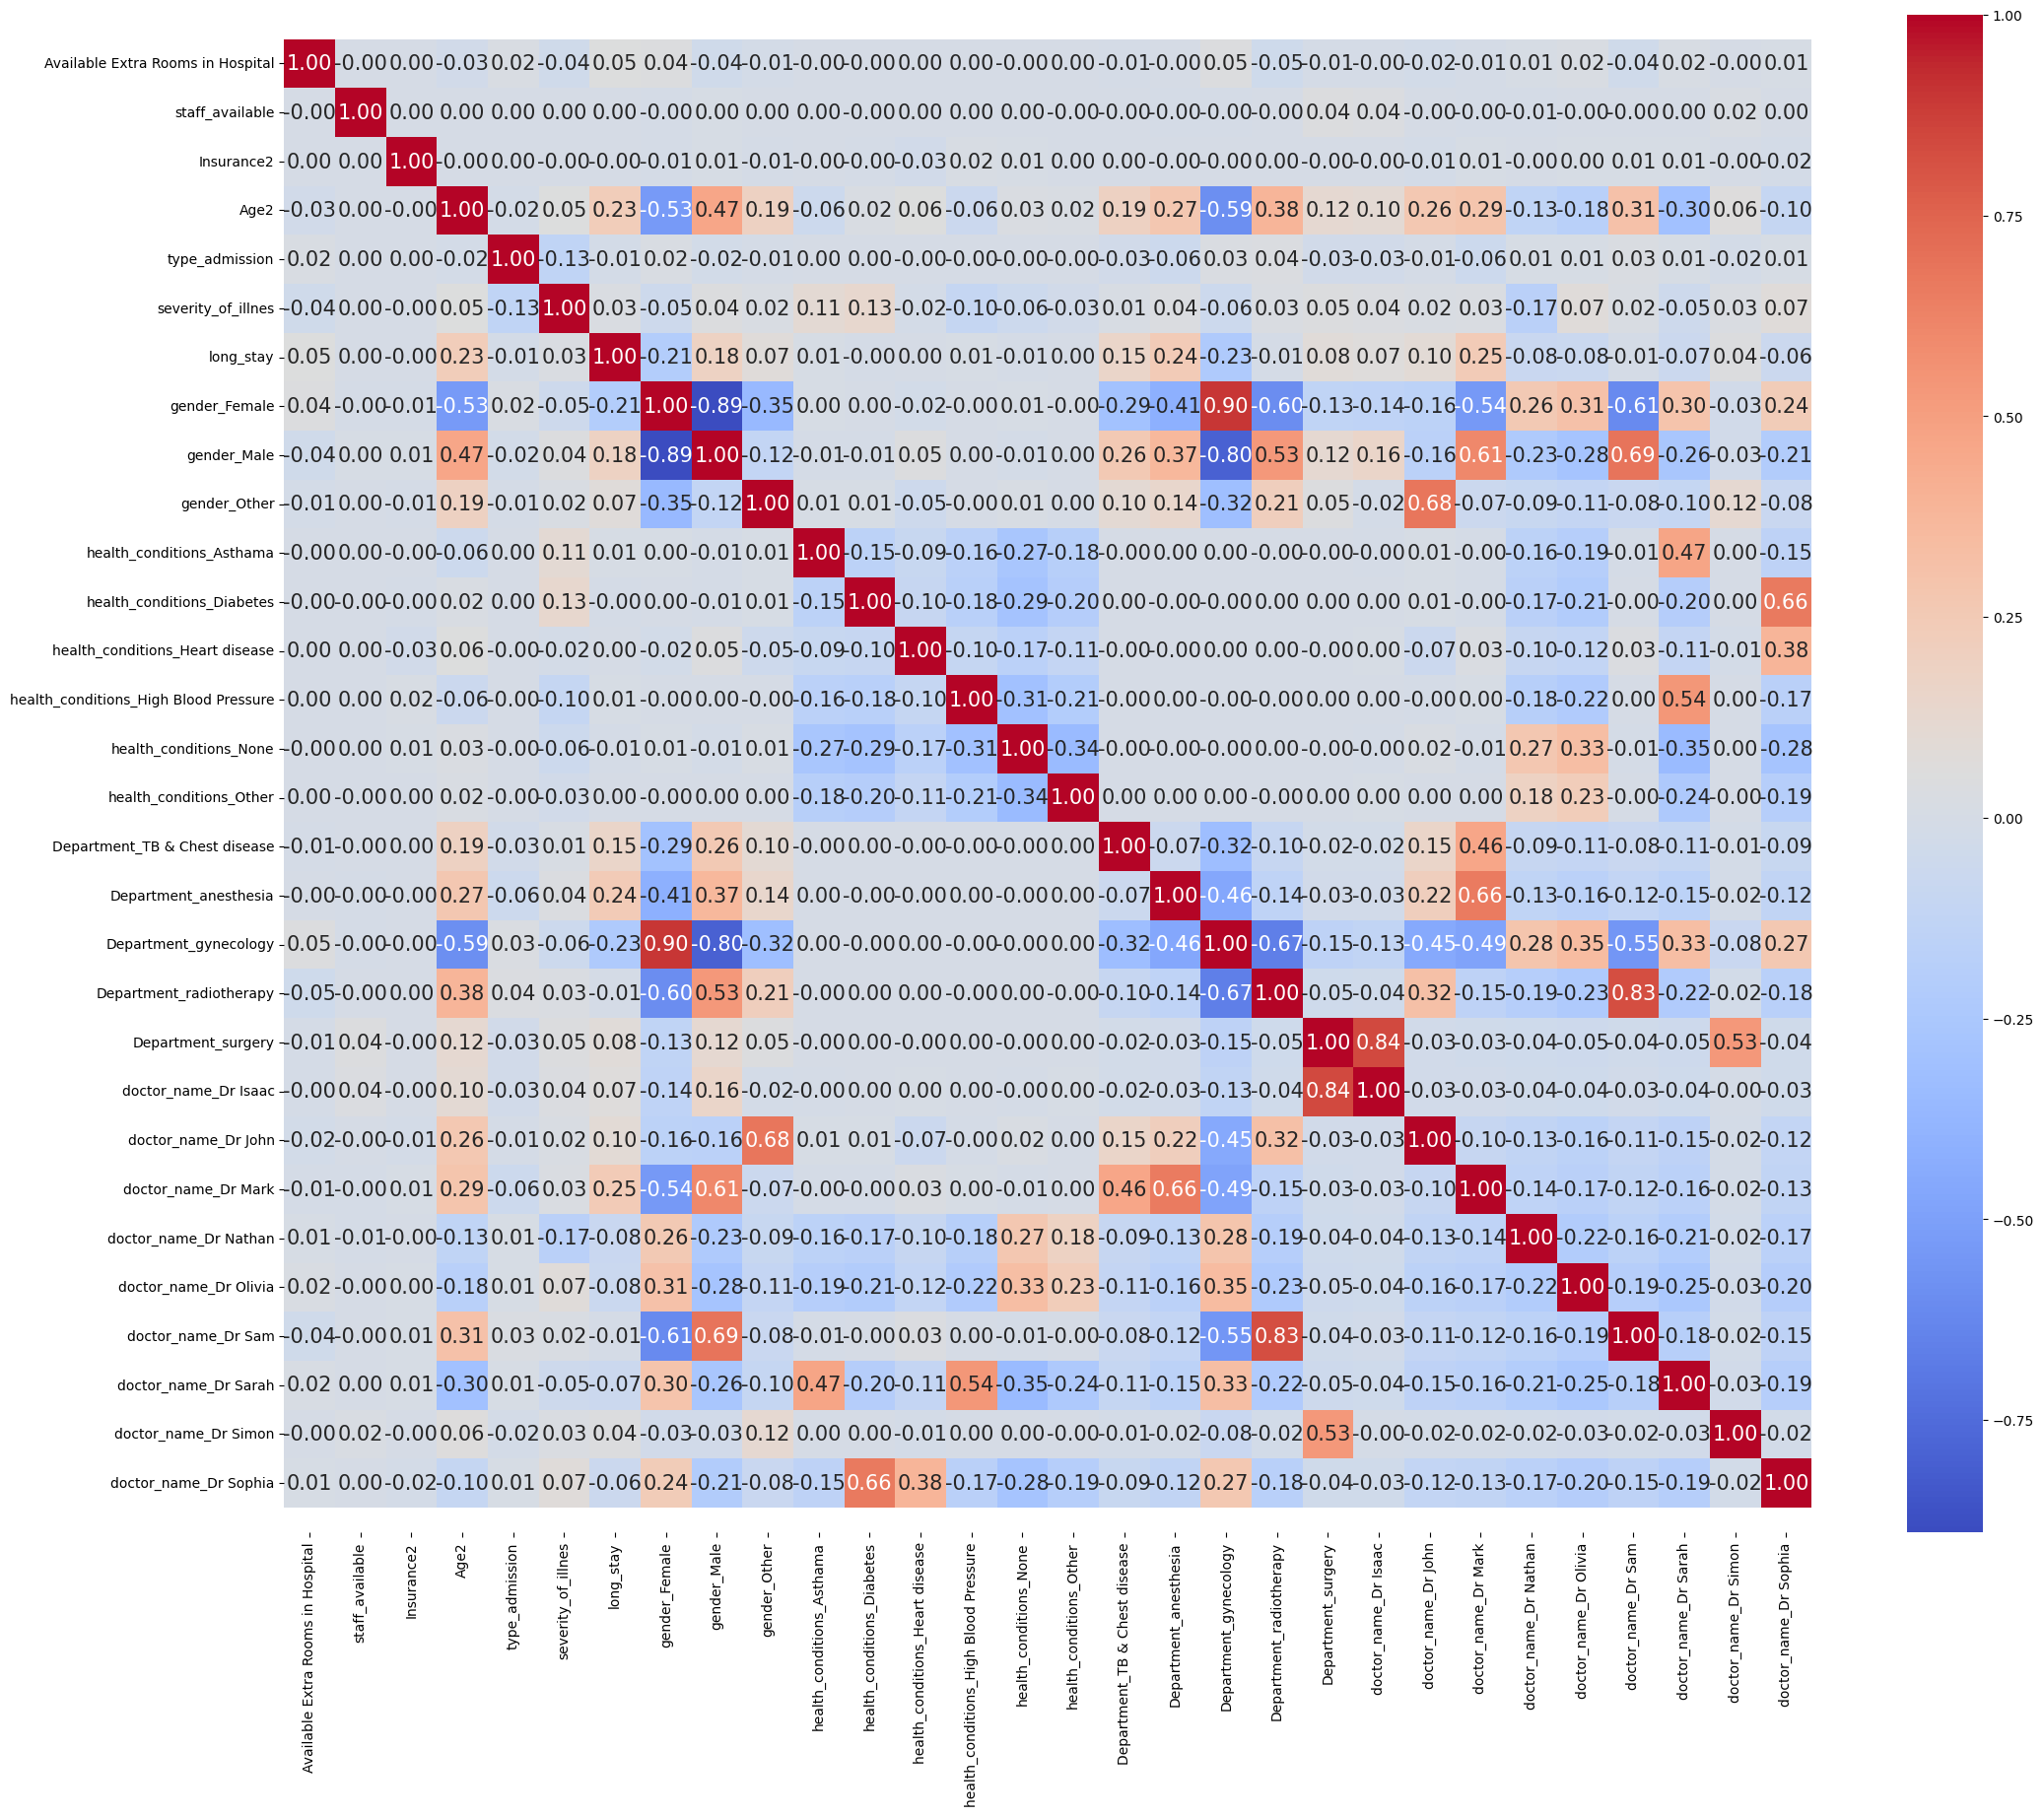

In [74]:
corr = df_train2.corr()
plot_corr_heatmap(corr)

Conclusiones: 
Variables que NO tienen correlacion con NINGUNA variable: (las voy a droppear antes de entrenar cualquier modelo)
avail room
staff available
insurance2
type_admisson: igual me la quedaria!
severity of illnes : que raro!! puedo igual quedarmela...

Variables que tienen correlacion con mi Target: (niguna tiene alta corr!) age, gender, department(algunos de ellos), dr mark! OSEA, no me dice mucho, de las mas esperadas ninguna muestra alta corr (health conditions, type of admission).
Es claro que el department esta asociado al dr name? puedo saberlo con seguridad? eso me diria si son totalmente redundantes health dpt y dr name, es decir, o me quedo una o la otra. 

Y si hiciese la misma matriz pero en vez de con 'long_stay', con 'Stay (in days)', es decir, antes de hacer variable dummy a este feature. 

In [75]:
#pruebo una distinta seleccion de features, cambio long_stay por su original, 'Stay (in days)':
columnas2=['Department','Ward_Facility_Code','patientid','Visitors with Patient','Admission_Deposit','doctor_name','Age','gender',
'Type of Admission', 'Severity of Illness', 'health_conditions','Insurance','long_stay'] 
df_train3 = df_train.drop(columnas2, axis=1)

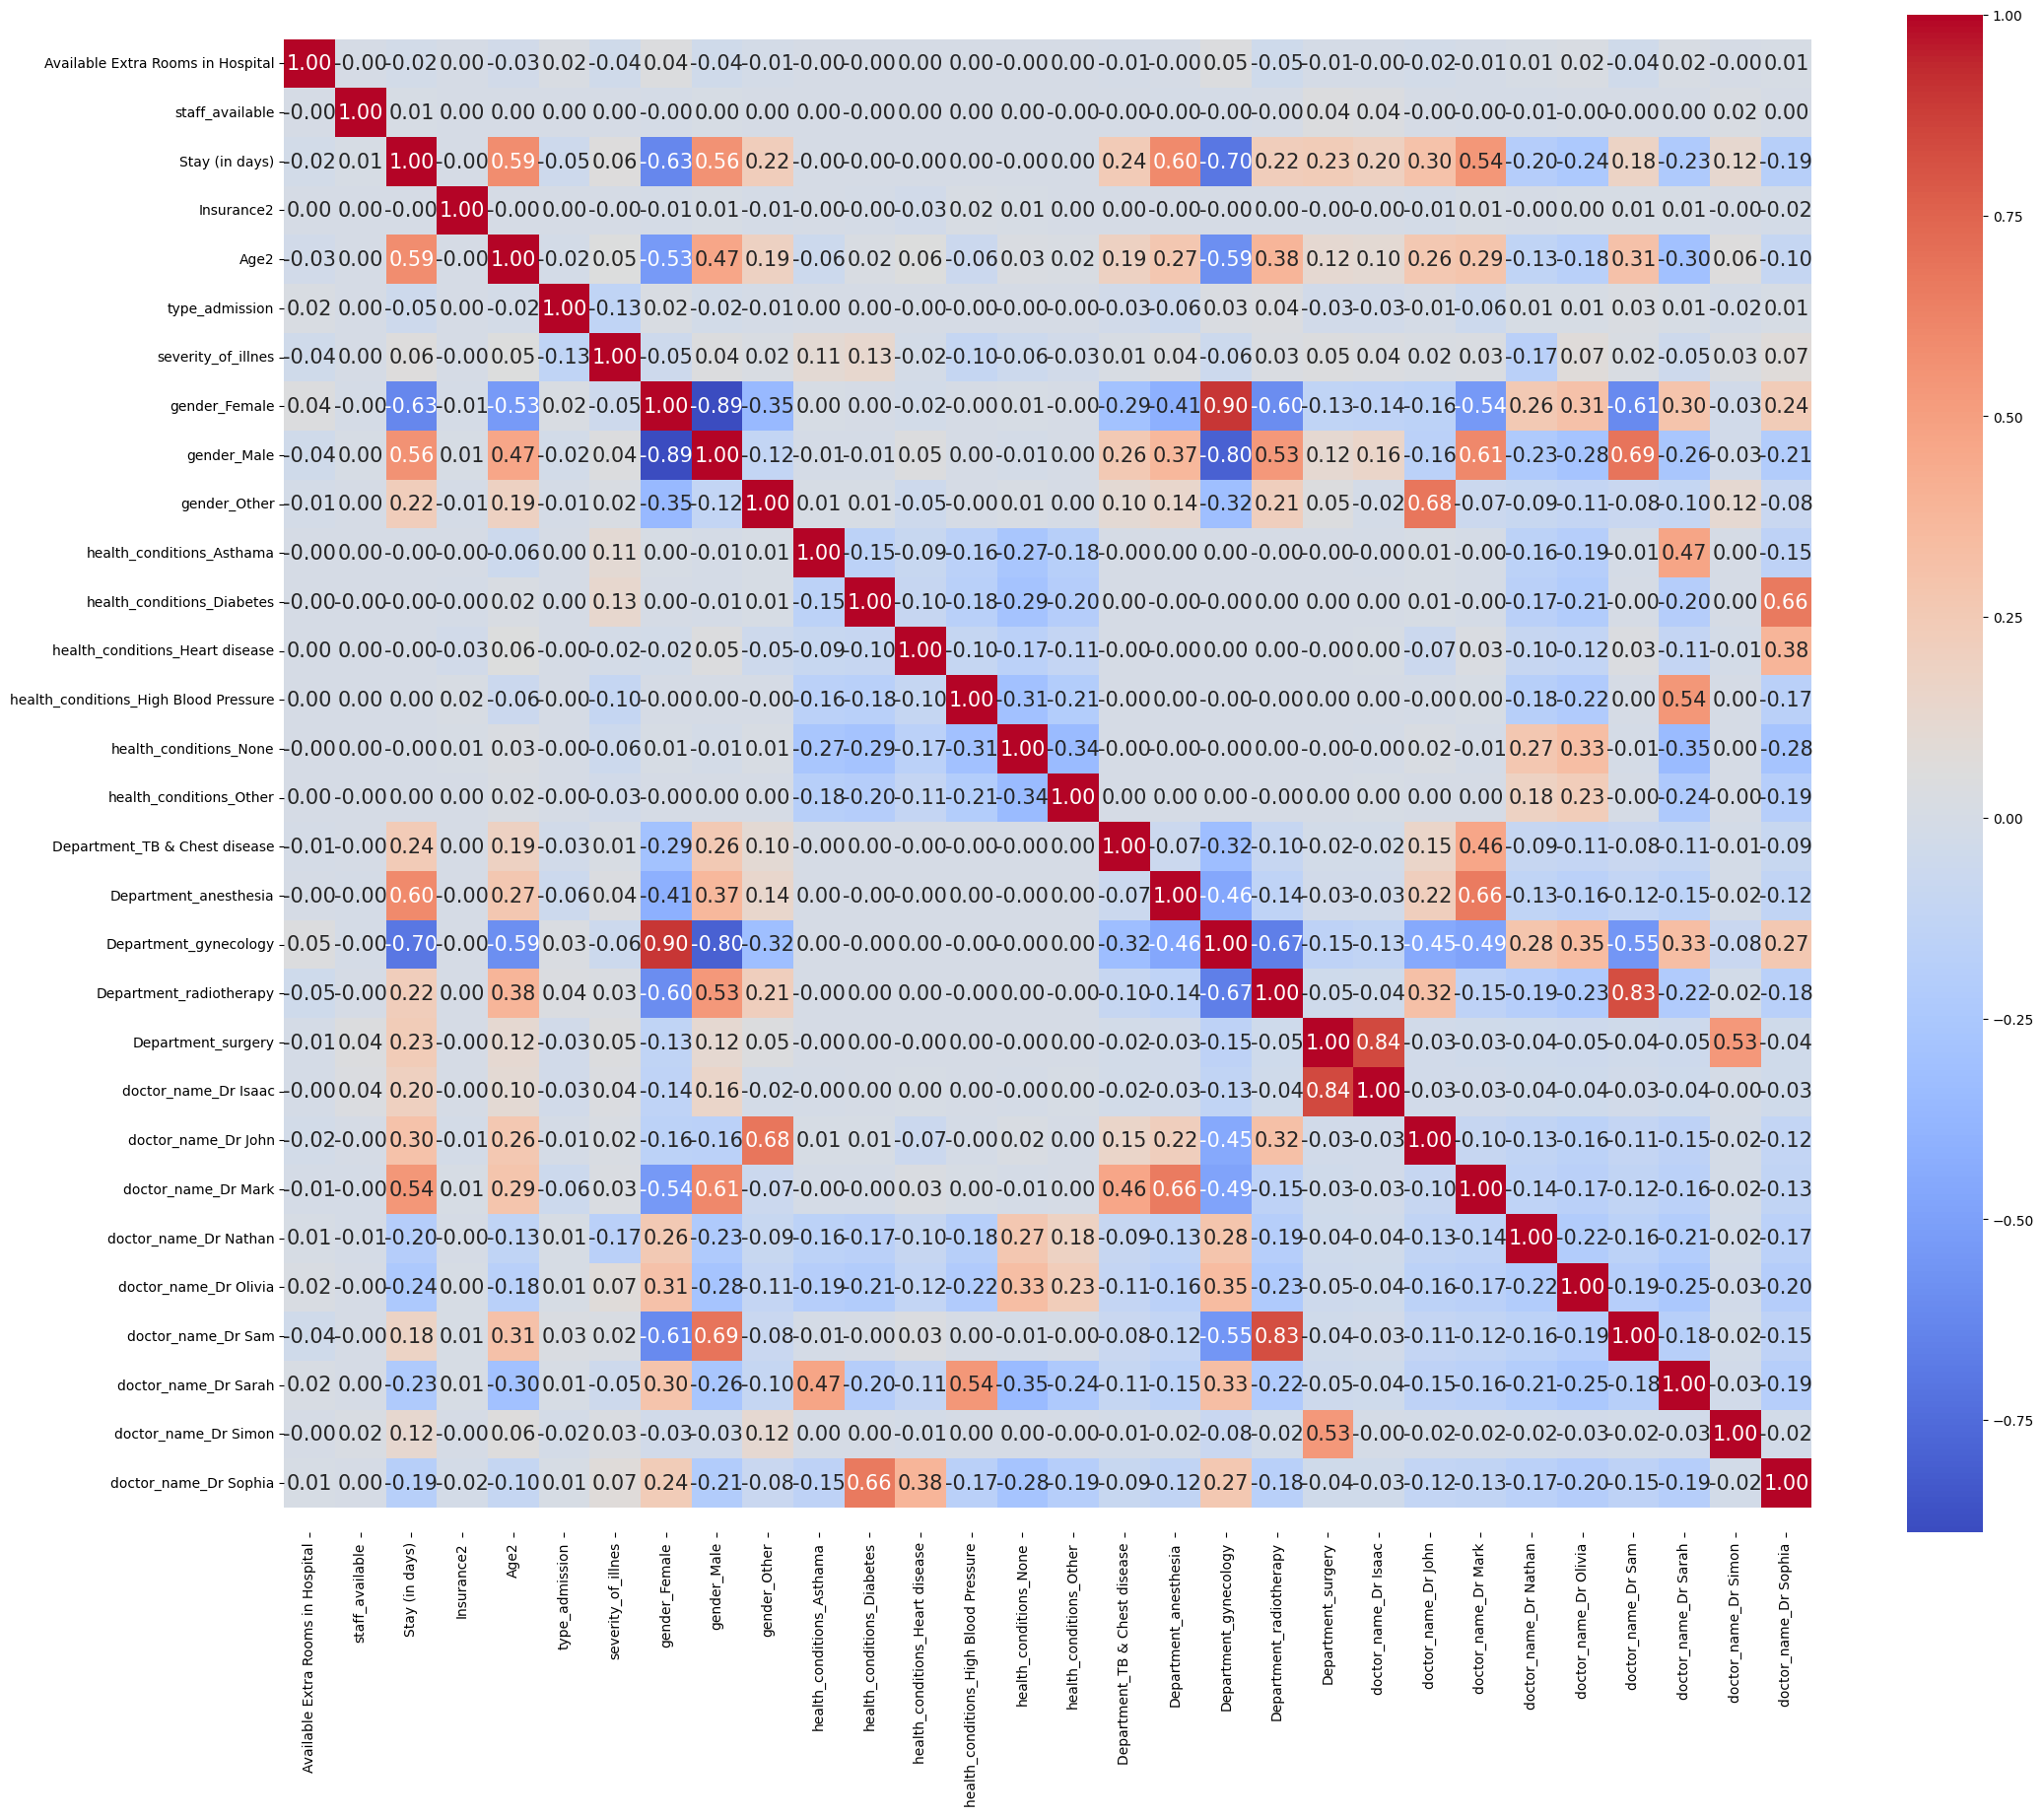

In [76]:
corr2 = df_train3.corr()
plot_corr_heatmap(corr2)

Correlaciones significativas con 'Stay (in days)': age, gender, y departamentos y doctores (Mark!) 
PERO, ahora las correlaciones aumentaron bastante, para los mismos features, pero cercanas a 0.6 !

Observo como las mas positivamente ('directamente') correlacionadas: gender male, age (algun grupo?), radiotherapy, y dr mark. A que departamento/s corresponde cada Dr? 

In [77]:
#Esta Dr Mark unicamente en un departamento?: Rta, NO!, pues me da mayor count para Mark solo....
print(df_train[(df_train['doctor_name_Dr Mark']==1) & (df_train['Department_anesthesia']==1)].shape)
print(df_train[(df_train['doctor_name_Dr Mark']==1)].shape)

(26194, 43)
(39790, 43)


REALIZO AHORA LAS MISMAS TRANSFORMACIONES, PERO PARA df_train:
seria conveniente un pipeline??? seguramente pero lo hago sin por ahora, si me sobra tiempo veo de incorporarlo. 

In [78]:
df_test.shape

(90000, 14)

AHORA SI, ESTOY LISTO PARA ELEGIR UN MODELO Y ENTRENARLO.
Como elegir el modelo?:

Que modelos de clasificacion tengo: tengo varias variables binarias, cual se comporta mejor?

DTrees. No encuentro argumentos contundentes (probablemente debido a mi poca experiencia) para elegir uno sobre otro, 
k-nn
svm
HACER CON CV Y GRID SEARCH. si me da tiempo. 
Ensambles: baggin, rand forest, boosting, xgboost.
     Me gusta RandForest porque hace seleccion de features, que es lo que haria yo manualmente....

No encuentro argumentos contundentes (probablemente debido a mi poca experiencia) para elegir uno sobre otro, por lo que comenzare con DecissionTree.

(División de dataset en train y test utilizando train_test_split, CV, KFold o similares).

In [79]:
# VALE LA PENA HACER UN PAIRPLOT EN ESTE PUNTO? MEJOR SERIA JUSTO DESPUES DE QUE TODAS LAS VARIABLES PASARON A NUMERICAS, EL TEMA ES Q SE ME CUELGA LA MAQUINA...
#sns.pairplot(data, hue="target") # palete=[]
#plt.show()

In [80]:
# Modelo con DecissionTree, 
#dropeo columnas que observé con correlacion muy baja o nula:
cols=['Available Extra Rooms in Hospital' , 'staff_available', 'Insurance2']
df_train4 = df_train2.drop(cols, axis=1)

In [81]:
df_train4.columns # tiene el target!

Index(['Age2', 'type_admission', 'severity_of_illnes', 'long_stay',
       'gender_Female', 'gender_Male', 'gender_Other',
       'health_conditions_Asthama', 'health_conditions_Diabetes',
       'health_conditions_Heart disease',
       'health_conditions_High Blood Pressure', 'health_conditions_None',
       'health_conditions_Other', 'Department_TB & Chest disease',
       'Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery', 'doctor_name_Dr Isaac',
       'doctor_name_Dr John', 'doctor_name_Dr Mark', 'doctor_name_Dr Nathan',
       'doctor_name_Dr Olivia', 'doctor_name_Dr Sam', 'doctor_name_Dr Sarah',
       'doctor_name_Dr Simon', 'doctor_name_Dr Sophia'],
      dtype='object')

In [96]:
from sklearn.tree import DecisionTreeClassifier #subir esto al comienzo del notebook?
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import clear_output

#instancio con depth=5. luego jugar!
tree = DecisionTreeClassifier(max_depth = 5, random_state = 42) 
#sera bueno considerar 'un' nivel de profundidad por cada variable que yo considero relevante???

In [97]:
#División de dataset en train y test utilizando train_test_split:
#le saco la variable target:
X = df_train4.drop(['long_stay'], axis=1)
#defino mi target y:
y = df_train4['long_stay']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.30, random_state=42) # o usar random=0 ??

In [98]:
# Entreno el modelo:

tree.fit(X.values,y.values)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [99]:
#evaluo recall:
print(tree.classes_)
print(tree.n_classes_)
print(tree.max_features_)
print(tree.feature_importances_)

# la predicccion:
y_pred = tree.predict(X.values)

print(accuracy_score(y,y_pred))
print(recall_score(y,y_pred))

[0 1]
2
26
[6.94502906e-01 0.00000000e+00 1.38097363e-03 6.38077435e-09
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.11143112e-03 0.00000000e+00 6.37387499e-02 9.79253841e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.41340549e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
0.6876146341463415
0.9999921696369843


Me da muy buen recall, poco accuracy. bueno para el datathon....? huele a mucho overfitting. 
accuracy esta muy cerca del Benchmark! (0.6223)

Por los modelos de arboles probados mas abajo, este parece el mas conveniente. !

Tendria q subir al form uno con peor recall a ver si eso lo hace mejorar en el test?

In [86]:
#meto ahora aca la prediccion para este modelo, pero sobre el TEST, para enviar a formulario:
df_TEST=pd.read_csv('test_modificado.csv')

In [87]:
df_TEST.shape #me agregó una col al export/import....

(90000, 27)

In [88]:
df_TEST.head()

,Unnamed: 0,Age2,type_admission,severity_of_illnes,gender_Female,gender_Male,gender_Other,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,...,Department_surgery,doctor_name_Dr Isaac,doctor_name_Dr John,doctor_name_Dr Mark,doctor_name_Dr Nathan,doctor_name_Dr Olivia,doctor_name_Dr Sam,doctor_name_Dr Sarah,doctor_name_Dr Simon,doctor_name_Dr Sophia
0,0,2,1,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,5,1,1,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,1,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2,1,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,5,1,2,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
df_TEST.drop('Unnamed: 0', axis=1, inplace=True)

In [95]:
#predigo ahora sobre el nuevo df: (hago un rename X a Xx porq me sobreescribe otro X de mas arriba)
Xx=df_TEST
y_final=tree.predict(Xx.values)

In [91]:
#ahora lo pongo en formato como pide para el formulario: 
#OBS: este csv lo guardo despues como monchoblanc1.csv !!
predicciones = pd.DataFrame(y_final, columns=['predi'])
predicciones.to_csv('monchoblanc.csv', index=False) #index False para q no me arrastre el indice como me paso recien con el otro...

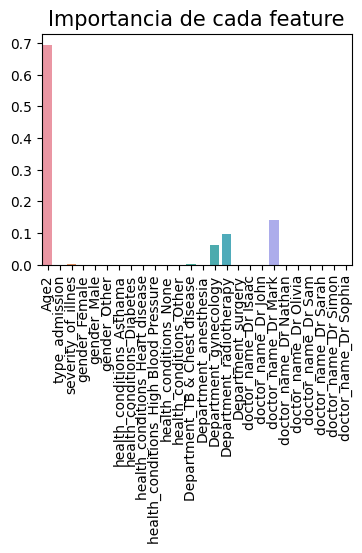

In [100]:
# sigo con el analisis de este primer modelo:
# Importancia de features:
plt.figure(figsize = (4,3))

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

Lo que me dice que basicamente lo que lo determina es la edad!???...........

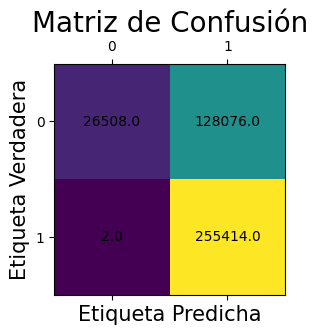

In [101]:
# Matriz de confusión 

cm = confusion_matrix(y, y_pred)

fig, ax = plt.subplots(figsize=(5,3))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

#print(classification_report(y, y_pred))

In [102]:
# PARA GRAFICAR EL ACCURACY!!: pero yo busco recall! igual me sirve, si quiero un modelo mas con menos overfitting,
# debo buscar equilibrar mas las metricas acc y recall.

tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

Completado: 100.0%


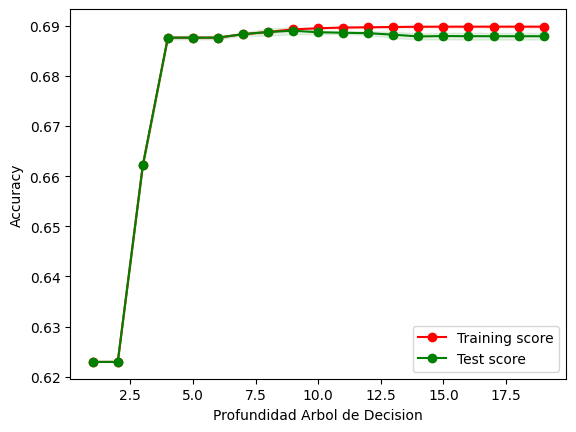

In [103]:
# EL PLOT PROPIAMENTE DICHO:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [ ]:
#esto es para accuracy, pero se observa que no aumenta para mayor profundidad, con un maximo en 9..? luego, pruebo para 
# max_depth=9 para ver cuanto me da el recall: 

In [104]:
tree9 = DecisionTreeClassifier(max_depth = 9, random_state = 42) 

#por las dudas empiezo de cero con el split:
X = df_train4.drop(['long_stay'], axis=1)
#defino mi target y:
y = df_train4['long_stay']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.30, random_state=42)

# Entreno el modelo:
tree9.fit(X.values,y.values)

#evaluo recall y accuracy:
print(tree9.feature_importances_)

y_pred = tree9.predict(X.values)

print(accuracy_score(y,y_pred))
print(recall_score(y,y_pred))

[6.94004909e-01 2.18051001e-03 3.01086483e-03 6.30073124e-09
 0.00000000e+00 8.99620171e-08 1.02620429e-04 8.77526042e-06
 8.95247592e-05 4.36293410e-05 4.92560430e-05 1.14264154e-07
 3.07885177e-04 7.89603682e-04 6.29391843e-02 9.66969671e-02
 6.75914985e-08 0.00000000e+00 0.00000000e+00 1.39567514e-01
 1.11915030e-04 0.00000000e+00 0.00000000e+00 3.93611587e-05
 0.00000000e+00 5.72017881e-05]
0.6893073170731707
0.964332696463808


Observo: me bajó un poco el recall, pero el accuracy esta solo un 0.02 mas alto...  

Ahora, probaria lo mismo, con max_depth entre 5 y 9, pero SOLO con los 4 'important features':
age, gineco, radiotherapy, dr mark

In [105]:
# modelo dt con 4 features unicamente!!:
tree_reduc6 = DecisionTreeClassifier(max_depth = 6, random_state = 42) 

#hago el split, esta vez con pocos features:
X = df_train4[['Age2','Department_gynecology','Department_radiotherapy','doctor_name_Dr Mark']]
#defino mi target y:
y = df_train4['long_stay']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.30, random_state=42)

# Entreno el modelo:
tree_reduc6.fit(X.values,y.values)

#evaluo recall y accuracy:
print(tree_reduc6.feature_importances_)

y_pred = tree_reduc6.predict(X.values)

print(accuracy_score(y,y_pred))
print(recall_score(y,y_pred))
#muy buen recall, igual accuracy....

[0.6962475  0.06389606 0.09816706 0.14168938]
0.6876146341463415
0.9999921696369843


In [106]:
#ahora lo mismo, pero profundidad 9:
tree_reduc6 = DecisionTreeClassifier(max_depth = 9, random_state = 42) 


X = df_train4[['Age2','Department_gynecology','Department_radiotherapy','doctor_name_Dr Mark']]
#defino mi target y:
y = df_train4['long_stay']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.30, random_state=42)

# Entreno el modelo:
tree_reduc6.fit(X.values,y.values)

#evaluo recall y accuracy:
print(tree_reduc6.feature_importances_)

y_pred = tree_reduc6.predict(X.values)

print(accuracy_score(y,y_pred))
print(recall_score(y,y_pred))
# esta dando casi EXACTO lo mismo que con depth 6. 

[0.69624779 0.063896   0.09816697 0.14168924]
0.6876146341463415
0.9999921696369843


AHORA PRUEBO ALGUN K-NN:

In [108]:
from sklearn.neighbors import KNeighborsClassifier

#knn=KNeighborsClassifier()
X = df_train4.drop(['long_stay'], axis=1)
#defino mi target y:
y = df_train4['long_stay']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.30, random_state=42)



In [110]:
# evaluo, con accuracy. probar de hacerlo directo con recall! medio exagerado hasta k=20 no?
# va  20 min y contando....10%!!!
#me fui al carajo creo. sera q esto no es tan vaiable para 400k registros.....
#le autmente el paso a 3 y solo hasta 15, q en realidad va aser 12... sino era 3+ horas de espera...
# ahora va 40% en 35min...60%...45min. 80%...60min.. 100% 62 min!
#capaz lo deberia haber sin el CV para q no sea tan largo!, solamente con fit y predict...
knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

n_vecinos = np.arange(1,15,3)
i = 0
i_max = len(n_vecinos)
for vecinos in n_vecinos:
    i = i + 1
    clf = KNeighborsClassifier(n_neighbors=vecinos)
    knn_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

Completado: 100.0%


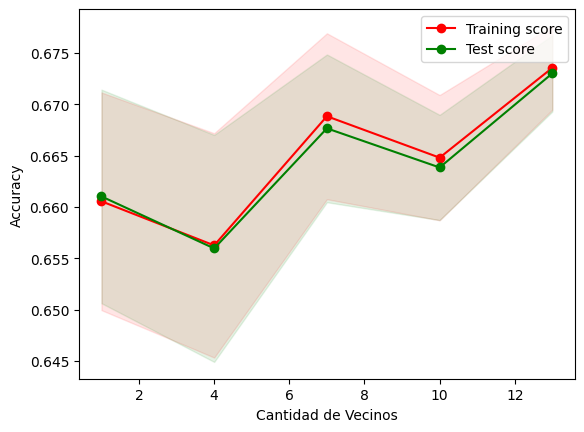

In [111]:
#ploteo:

plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()

tardo mucho para ni tantas pruebas!, luego voy a probar con un k=16 o 20 a ver q pasa. 
Pero igualmente haciendo CV. 

In [112]:
knn=KNeighborsClassifier(n_neighbors=16)
X = df_train4.drop(['long_stay'], axis=1)
#defino mi target y:
y = df_train4['long_stay']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [113]:
knn_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
print(knn_scores)
# me da valores muy cercanos a 0.67. 

/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/moncho/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be conver

{'fit_time': array([1.39665699, 1.57203603, 1.52465582, 1.505795  , 1.44104505]), 'score_time': array([107.61859393, 107.696141  , 107.75985003, 108.25138211,
       107.90259385]), 'test_score': array([0.68013415, 0.67029268, 0.6732439 , 0.6707439 , 0.67062195]), 'train_score': array([0.68168598, 0.67176524, 0.67101524, 0.67159146, 0.67167073])}


PRUEBO UNO MAS, CON EL K ALTO PERO SIN CV:

In [115]:
# k=22:
knn=KNeighborsClassifier(n_neighbors=22)
X = df_train4.drop(['long_stay'], axis=1)
#defino mi target y:
y = df_train4['long_stay']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.30, random_state=42)

# Entreno el modelo:
knn.fit(X.values,y.values)

#evaluo recall y accuracy:

y_pred = knn.predict(X.values)

print(accuracy_score(y,y_pred))
print(recall_score(y,y_pred))
# la metricas no son buenas, pero igual lo subo al form, para ver que pasa al enfrentarse al real Test. 
#OBS: este modelo, me mantuvo mas parejas las metricas con train y test (dashboard).

0.6682853658536585
0.7785299276474458


Modelo 'final', hago  2do comit 'knn_22'.

In [117]:
# corro nuevamente esto, para el subir al form. 
# OBS: HASTA AHROA ESTE EL DE MEJOR METRICAS! por ende la guardo como monchoblanc.csv 
Xx=df_TEST
y_final=knn.predict(Xx.values)

predicciones = pd.DataFrame(y_final, columns=['predi'])
predicciones.to_csv('monchoblanc.csv', index=False) 
# esta me tiro un recall de 0.719, comparado a 0.667 del primero q subi!. como 0.05 mejor!

Ahora pruebo otro knn, pero solo con 4 features!:

In [141]:
knn15=KNeighborsClassifier(n_neighbors=15)

X = df_train4[['Age2','Department_gynecology','Department_radiotherapy','doctor_name_Dr Mark']]
#defino mi target y:
y = df_train4['long_stay']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.30, random_state=42)

knn15.fit(X.values,y.values)

#evaluo recall y accuracy:

y_pred = knn15.predict(X.values)

print(accuracy_score(y,y_pred))
print(recall_score(y,y_pred))
#0.83 en el train. mejoro un pcoo

0.6705658536585366
0.832171829486015


In [143]:
# subo este al dashboard, pero modifico el df_TEST a las variables q estoy usando:
#obs: esta en la 3ra subida, con k=15, 4 variables.
Xx=df_TEST[['Age2','Department_gynecology','Department_radiotherapy','doctor_name_Dr Mark']]
y_final=knn15.predict(Xx.values)

predicciones = pd.DataFrame(y_final, columns=['predi'])
predicciones.to_csv('monchoblanc.csv', index=False) 
# cuanto dio recall en el dashboard: 0.70. magia no iba  a hacer o si?

In [138]:
#misma cosa con k=22:
knn=KNeighborsClassifier(n_neighbors=22)

X = df_train4[['Age2','Department_gynecology','Department_radiotherapy','doctor_name_Dr Mark']]
#defino mi target y:
y = df_train4['long_stay']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.30, random_state=42)

knn.fit(X.values,y.values)

#evaluo recall y accuracy:

y_pred = knn.predict(X.values)

print(accuracy_score(y,y_pred))
print(recall_score(y,y_pred))
#EMPEORO!, A 0.73

0.6597170731707317
0.7323307858552323


In [139]:
#misma cosa pero con k=10:
knn=KNeighborsClassifier(n_neighbors=10)

X = df_train4[['Age2','Department_gynecology','Department_radiotherapy','doctor_name_Dr Mark']]
#defino mi target y:
y = df_train4['long_stay']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.30, random_state=42)

knn.fit(X.values,y.values)

#evaluo recall y accuracy:

y_pred = knn.predict(X.values)

print(accuracy_score(y,y_pred))
print(recall_score(y,y_pred))
# HORRIBLE!

0.6342512195121951
0.4778165815767219
